In [1]:
import pandas as pd
import numpy as np

In [2]:
imdb=pd.read_csv('IMDB Dataset.csv')

In [3]:
imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
imdb.shape

(50000, 2)

In [14]:
imdb.iloc[3].values[0]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

1. #### Data Cleaning Steps

    - Lowering case
    - Removing leading and trailing spaces
    - Removing HTML tags
    - Removing URLs
    - Expanding contractions (such as you'll to you will, couldn't to could not)
    - Spelling Correction
    - Punctuation
    - Removing Special Characters

2. #### Preprocessing 

    - Such as
        - Tokenization
        - Stopword Removal
        - Stemming

3. #### EDA
4. #### Make Features
5. #### Vectorization
    - BOW
    - TF-IDF

6. #### Modelling
7. #### Evaluation
8. #### Deployment
9. #### Monitoring

In [18]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [20]:
imdb.duplicated().sum()

np.int64(418)

In [24]:
#Removing the duplicated rows
imdb.drop_duplicates(inplace=True)

In [23]:
imdb.duplicated().sum()

np.int64(0)

In [27]:
df=imdb.iloc[0:10000]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
10012,I was pleasantly surprised to find that How to...,positive
10013,This is a very moving film that takes a new tw...,positive
10014,Apart from the beautiful imagery thanks to New...,negative
10015,This is a perfect series for family viewing. W...,positive


### Data Cleaning

In [35]:
#Converting the text into the lower case
df['review']=df['review'].str.lower()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\2853966683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].str.lower()


In [33]:
#Removing any spaces
df['review']=df['review'].str.strip()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\3483649451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].str.strip()


In [34]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [39]:
#Removing the HTML Tags

import re

def remove_html(data):
    data=re.sub(r'<.*?>','',data)
    return data

In [41]:
df['review']=df['review'].apply(remove_html)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\593116413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_html)


In [42]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing. w...
10016    a really very bad movie, with a very few good ...
Name: review, Length: 10000, dtype: object

In [61]:
#Checking any URLs
df['review'].str.contains(r"https?://\S+|www\.\S+",'').sum()
df[df['review'].str.contains(r"https?://\S+|www\.\S+",'')]['review'].head(1).values
#As we can see a URL is present in this review

array(['mario lewis of the competitive enterprise institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled a convenient lie. the website address where his debunking report, which is titled "a skeptic\'s guide to an inconvenient truth" can be found at is :www.cei.org. a shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the y2k scare of 1999, which gore also endorsed, as he did the pseudo-scientific film the day after tomorrow, which was based on a book written by alleged ufo abductee whitley strieber. as james "the amazing" randi does to psychics, and philip klass does to ufos, and gerald posner does to jfk conspir-idiocy theories, so does mario lewis does to al gore\'s movie and the whole "global warming" scam.'],
      dtype=object)

In [51]:
#Removing the URLs
df['review']=df['review'].str.replace(r"https?://\S+|www\.\S+",'')

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\1877042287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].str.replace(r"https?://\S+|www\.\S+",'')


In [54]:
df['review'].iloc[0]
#As we can see that URLs got removed

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [57]:
!pip install --upgrade contractions


   ---------- ----------------------------- 1/4 [anyascii]
   ---------------------------------------- 4/4 [contractions]



In [59]:
import contractions

In [64]:
df[df['review'].str.contains(r"\b\w+'(?:t|s|re|ve|ll|d|m)\b")]['review'].head(1).values

array(["one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other s

In [69]:
#Removing the contractions
df['review']=df['review'].apply(contractions.fix)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\982372393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(contractions.fix)


In [74]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 4.1 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.7 MB/s  0:00:00

   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   -------------------- ------------------- 2/4 [nltk]
   ------------------

In [76]:
from textblob import TextBlob

In [90]:
msg='Hey, I can drve you home'
TextBlob(msg).correct().string

'Key, I can drove you home'

In [92]:
def spelling_check(text):
    return TextBlob(text).correct().string

In [93]:
#Spelling Correction
df['review'].apply(spelling_check)

KeyboardInterrupt: 

In [94]:
import string

In [95]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [96]:
#Removing the Punctuation

def remove_punct(text):
    for i in string.punctuation:
        if i in text:
            text=text.replace(i,'')
    return text

In [98]:
df['review']=df['review'].apply(remove_punct)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\252641604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_punct)


In [99]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter matteis love in the time of money is a ...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing we...
10016    a really very bad movie with a very few good m...
Name: review, Length: 10000, dtype: object

In [102]:
#Removing Special Characters
df['review']=df['review'].str.replace('[^\w\s]',"",regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\3505756288.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['review']=df['review'].str.replace('[^\w\s]',"",regex=True)
C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\3505756288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].str.replace('[^\w\s]',"",regex=True)


In [103]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter matteis love in the time of money is a ...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing we...
10016    a really very bad movie with a very few good m...
Name: review, Length: 10000, dtype: object

### Preprocessing

In [114]:
#Tokenization
from nltk.tokenize import word_tokenize

In [106]:
df['review'].apply(word_tokenize)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Abhi/nltk_data'
    - 'C:\\Users\\Abhi\\miniconda3\\nltk_data'
    - 'C:\\Users\\Abhi\\miniconda3\\share\\nltk_data'
    - 'C:\\Users\\Abhi\\miniconda3\\lib\\nltk_data'
    - 'C:\\Users\\Abhi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [110]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [112]:
df['tokenized_reviews']=df['review'].apply(word_tokenize)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\3048370538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_reviews']=df['review'].apply(word_tokenize)


In [113]:
df

,review,sentiment,tokenized_reviews
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."
...,...,...,...
10012,i was pleasantly surprised to find that how to...,positive,"[i, was, pleasantly, surprised, to, find, that..."
10013,this is a very moving film that takes a new tw...,positive,"[this, is, a, very, moving, film, that, takes,..."
10014,apart from the beautiful imagery thanks to new...,negative,"[apart, from, the, beautiful, imagery, thanks,..."
10015,this is a perfect series for family viewing we...,positive,"[this, is, a, perfect, series, for, family, vi..."


In [119]:
#Stop Word Removal
from nltk.corpus import stopwords

In [118]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [120]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [135]:
STOP = set(stopwords.words('english'))

def stopwords_remove(text):
    return [word for word in text if word not in STOP]

df['tokenized_reviews_nostop'] = df['tokenized_reviews'].apply(stopwords_remove)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\836179009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_reviews_nostop'] = df['tokenized_reviews'].apply(stopwords_remove)


In [136]:
df

,review,sentiment,tokenized_reviews,tokenized_reviews_nostop
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,..."
...,...,...,...,...
10012,i was pleasantly surprised to find that how to...,positive,"[i, was, pleasantly, surprised, to, find, that...","[pleasantly, surprised, find, lose, friends, a..."
10013,this is a very moving film that takes a new tw...,positive,"[this, is, a, very, moving, film, that, takes,...","[moving, film, takes, new, twist, somewhere, r..."
10014,apart from the beautiful imagery thanks to new...,negative,"[apart, from, the, beautiful, imagery, thanks,...","[apart, beautiful, imagery, thanks, new, zeala..."
10015,this is a perfect series for family viewing we...,positive,"[this, is, a, perfect, series, for, family, vi...","[perfect, series, family, viewing, gather, aro..."


### EDA (Exploratory Data Analysis)

In [141]:
#Creating a new column with total no, of character 
df['char_length']=df['review'].str.len()
df

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\2703182620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_length']=df['review'].str.len()


,review,sentiment,tokenized_reviews,tokenized_reviews_nostop,char_length
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e...",1684
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn...",936
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",882
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li...","[basically, family, little, boy, jake, thinks,...",694
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...",1237
...,...,...,...,...,...
10012,i was pleasantly surprised to find that how to...,positive,"[i, was, pleasantly, surprised, to, find, that...","[pleasantly, surprised, find, lose, friends, a...",960
10013,this is a very moving film that takes a new tw...,positive,"[this, is, a, very, moving, film, that, takes,...","[moving, film, takes, new, twist, somewhere, r...",687
10014,apart from the beautiful imagery thanks to new...,negative,"[apart, from, the, beautiful, imagery, thanks,...","[apart, beautiful, imagery, thanks, new, zeala...",1681
10015,this is a perfect series for family viewing we...,positive,"[this, is, a, perfect, series, for, family, vi...","[perfect, series, family, viewing, gather, aro...",1638


In [145]:
df['word_length']=df['tokenized_reviews_nostop'].str.len()

C:\Users\Abhi\AppData\Local\Temp\ipykernel_9748\2526341344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_length']=df['tokenized_reviews_nostop'].str.len()


In [146]:
import seaborn as sns

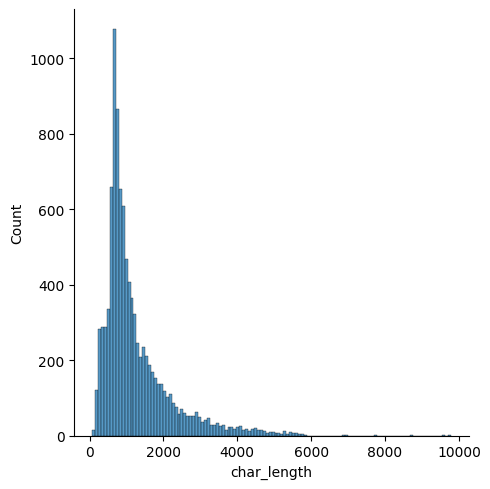

In [148]:
sns.displot(df['char_length'])

In [149]:
#Now, as we have build the distribution plot. Our main concern is whether this plot is helping us in any way for identifying
#postive reviews and negavite reviews or not.

#we can understand that if we plot the same graph seperately for +, - reviews, so that we can get an idea whether the positive and negative review
#depending upon the no. of characters

In [153]:
df[df['sentiment']=='positive']['char_length']

0        1684
1         936
2         882
4        1237
5         639
         ... 
10009    5533
10010    1066
10012     960
10013     687
10015    1638
Name: char_length, Length: 5030, dtype: int64

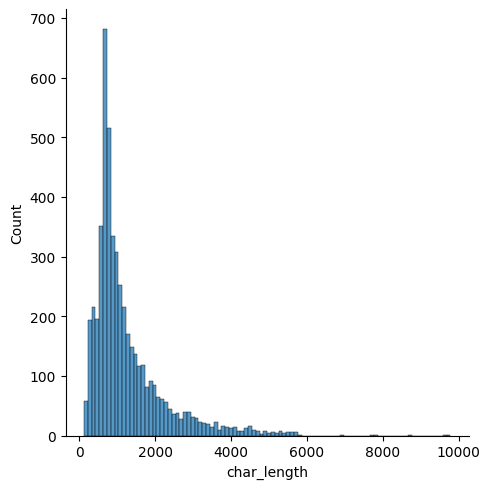

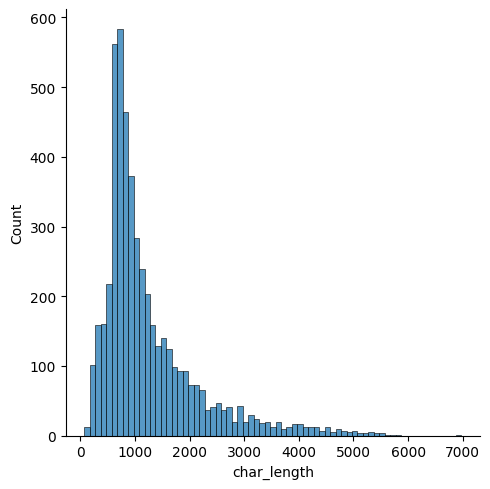

In [155]:
sns.displot(df[df['sentiment']=='positive']['char_length'])
sns.displot(df[df['sentiment']=='negative']['char_length'])

In [156]:
#As we can see not much difference is there for + and - reviews, it means that the char_lenth is not affecting much
#in determining the sentiments

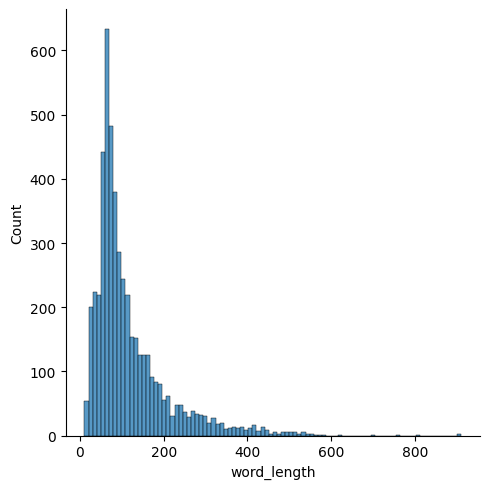

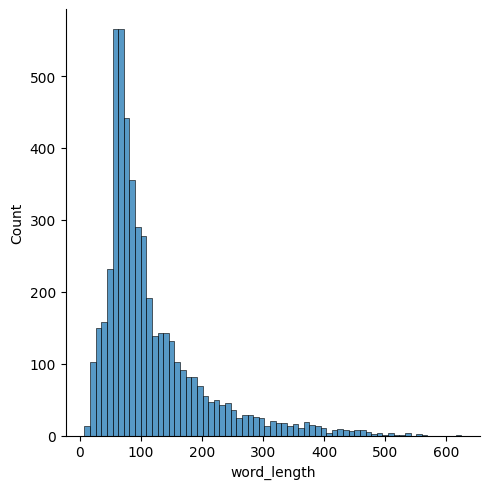

In [158]:
#Now, lets try for word_length
sns.displot(df[df['sentiment']=='positive']['word_length'])
sns.displot(df[df['sentiment']=='negative']['word_length'])

In [169]:
#We will try to find out the bi-gram and tri-gram
#Bi-gram means the combination of two words, tri-gram means the combination of three words
s=df['tokenized_reviews_nostop'].sum()
s

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 '

In [170]:
from nltk import ngrams

In [172]:
pd.Series(ngrams(s,2)).value_counts()

(ever, seen)          460
(special, effects)    438
(let, us)             391
(even, though)        376
(one, best)           348
                     ... 
(less, confusion)       1
(renumber, cause)       1
(entry, renumber)       1
(series, entry)         1
(real, series)          1
Name: count, Length: 842450, dtype: int64

In [173]:
pd.Series(ngrams(s,3)).value_counts()

(movie, ever, seen)                 91
(worst, movie, ever)                89
(one, worst, movies)                55
(movies, ever, seen)                53
(worst, movies, ever)               50
                                    ..
(faint, hearted, timid)              1
(hearted, timid, show)               1
(timid, show, pulls)                 1
(show, pulls, punches)               1
(reviewers, mentioned, watching)     1
Name: count, Length: 1145375, dtype: int64

In [175]:
!pip install wordcloud

In [177]:
#Creating a Word Cloud

from wordcloud import WordCloud
from matplotlib import pyplot as plt

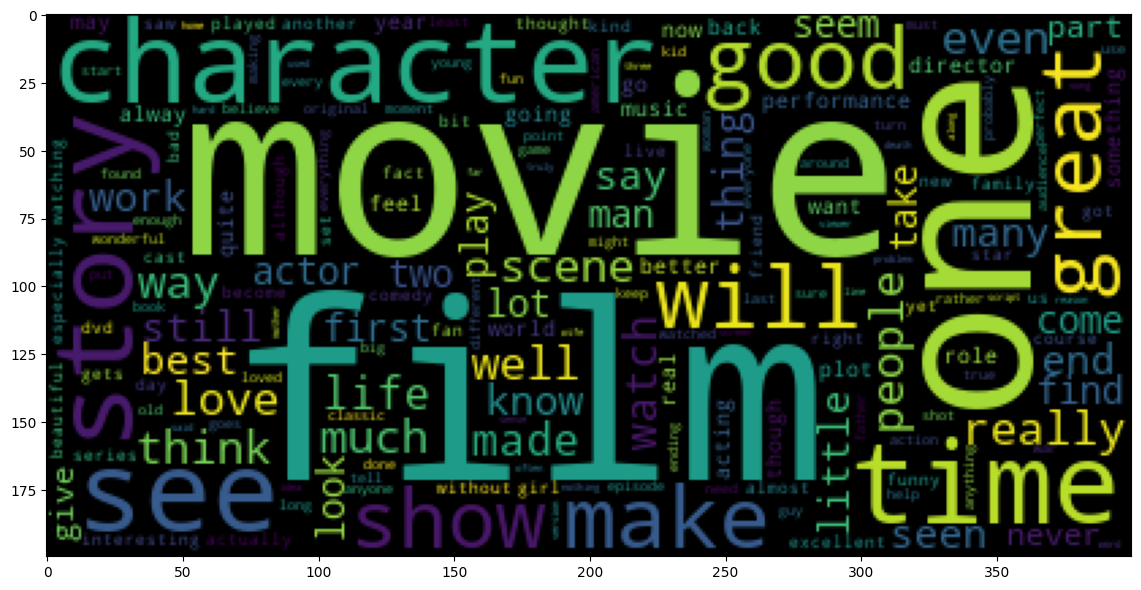

In [183]:
#Word Count for Positive Review
plt.figure(figsize=(14,14))
wc=WordCloud(width=400,height=200).generate(' '.join(df[df['sentiment']=='positive']['review']))
plt.imshow(wc)

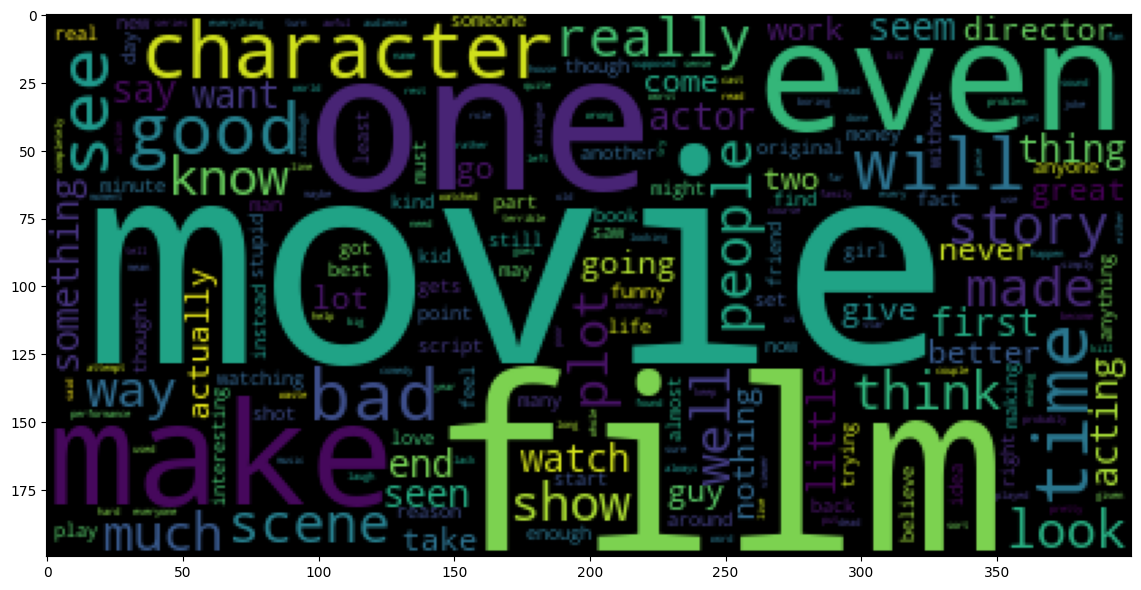

In [184]:
#Word Count for negative review
plt.figure(figsize=(14,14))
wc=WordCloud(width=400,height=200).generate(' '.join(df[df['sentiment']=='negative']['review']))
plt.imshow(wc)

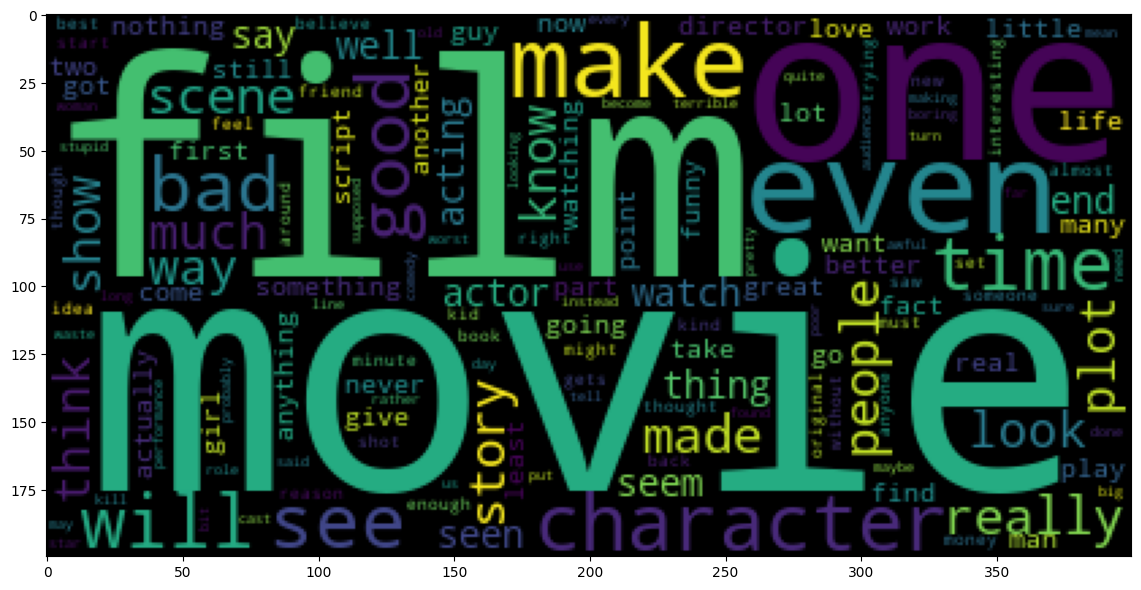

In [189]:
plt.figure(figsize=(14,14))
wc=WordCloud(width=400,height=200).generate(df[df['sentiment']=='negative']['review'].sum())
plt.imshow(wc)

### Vectorization

##### BOW (Bag of Word) Approach
- The bag-of-word approach first create a unique words vocabulary out of the text data.
- Once the words are ready, in bag-of-words a matrix is created where the columns are the words and for each row it calculates the occurance (frequency) of word

So, it would be something like

   w1 w2 w3 w4
t1 1  0  0  1
t2 0  0  1  1
t3 1  1  1  0

In [195]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------ --------------------- 3.7/8.0 MB 23.8 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 17.6 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 18.6 MB/s  0:00:00
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   -------- ------------------------------- 7.6/36.3 MB 35.1 MB/s eta 0:00:01
   -------------------- ------------------- 18.4/36.3 MB 43.5 MB/s eta 0:00:01
   ----------------------------- ---------- 27.0/36.3 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------  36.2/36.3 MB 44.9 MB/s eta 0:00:01
   ---------------------------------------- 36.3/36.3 MB 42.0 MB/s  0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
  

In [ ]:
#Bag of Words

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names())

In [201]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1623084 stored elements and shape (10000, 5000)>